# Data Exploration 
Stroke Prediction Data set

Import libraries

In [2]:
import pandas as pd
from utils import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\Bruger\anaconda3\envs\datascience\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data and prep

In [3]:
data_loader = DataLoader("healthcare-dataset-stroke-data.csv")
data_loader.load_dataset()
data = data_loader.data

print(data.shape)
data.head() 

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Drop id

In [4]:
data.drop(columns='id',inplace=True) # We drop the id column as it is not relevant for the exploration
data.info() # We notice missing values present in the BMI column  only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Distributions of variables

## Numeric variables

col:  age


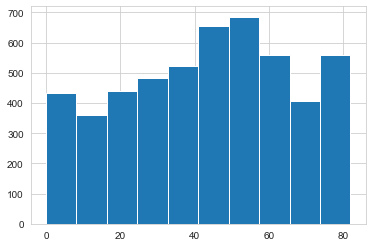

col:  avg_glucose_level


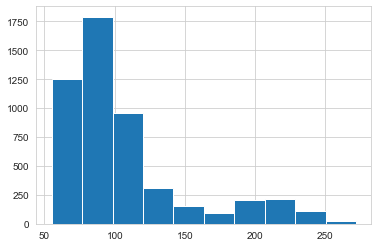

col:  bmi


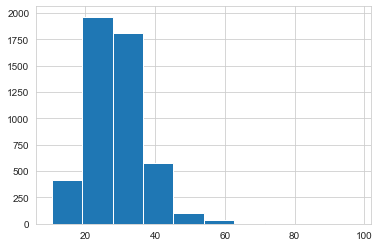

In [105]:
columns = data.columns[1],data.columns[7], data.columns[8]
for col in columns:
    print("col: ", col)
    data[col].hist()
    plt.show()

We see that avg_glucose_level is right skewed. The variables do not look perferctly gaussian, but not too bas either. 

## Categorical variables

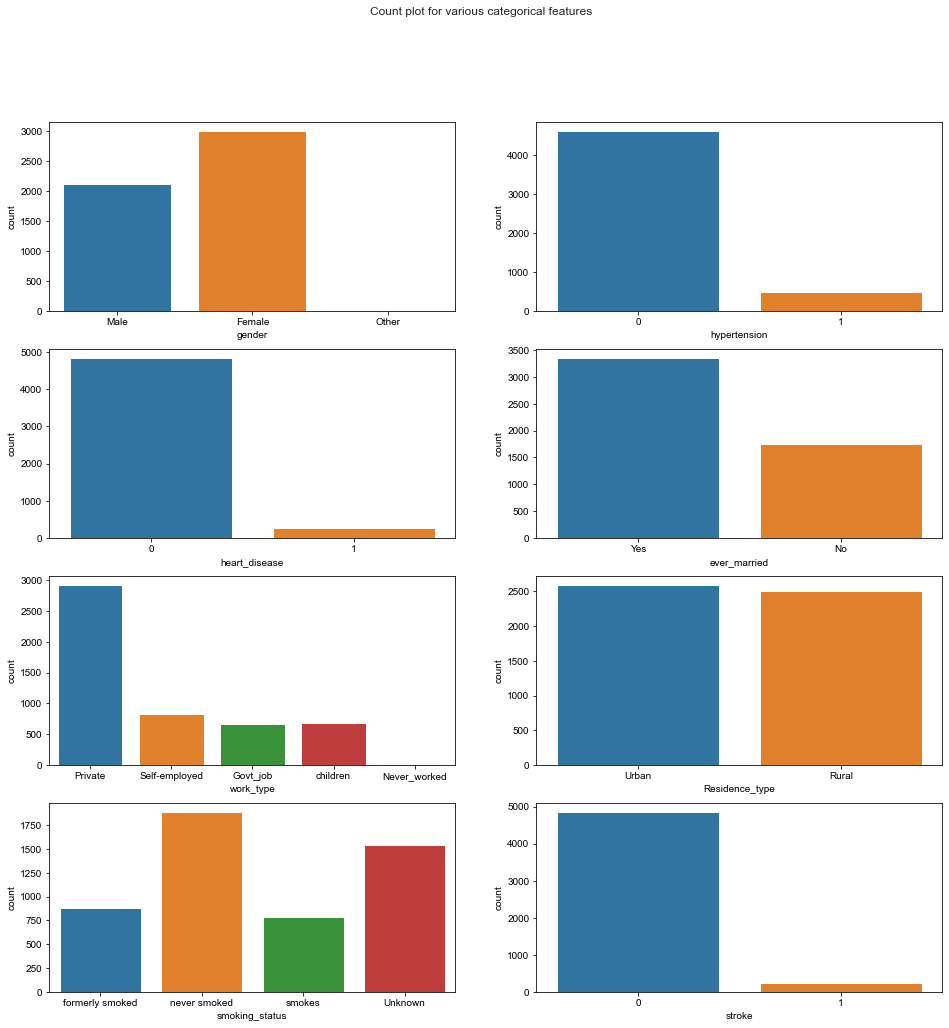

In [51]:
# The data for the categorical variables
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=data,x='gender')
sns.countplot(ax=axes[0,1],data=data,x='hypertension')
sns.countplot(ax=axes[1,0],data=data,x='heart_disease')
sns.countplot(ax=axes[1,1],data=data,x='ever_married')
sns.countplot(ax=axes[2,0],data=data,x='work_type')
sns.countplot(ax=axes[2,1],data=data,x='Residence_type')
sns.countplot(ax=axes[3,0],data=data,x='smoking_status')
sns.countplot(ax=axes[3,1],data=data,x='stroke')

plt.show()

We see from the stroke column that the data is higly imbalanced. We have much more datapoints from participants without strokes. We will account for this in the preprocessing. 

We also see that hypertension and heart_disease are highly imbalanced. 


# Variables distributed by stroke yes/no

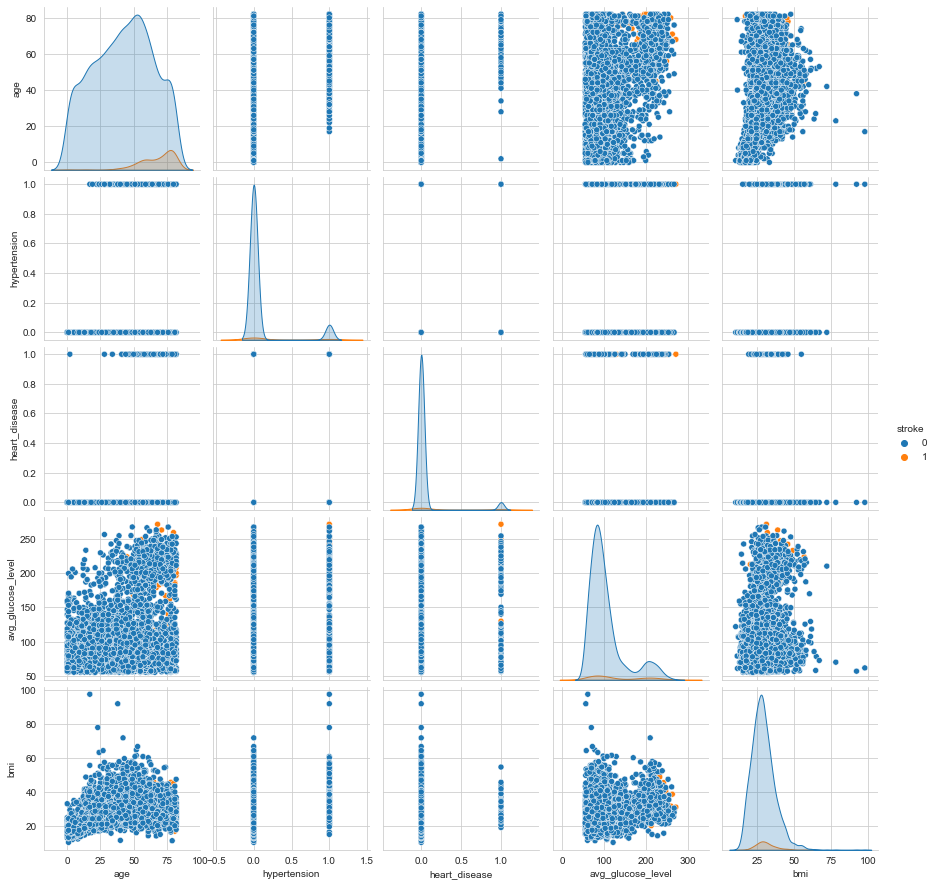

In [84]:
from seaborn import pairplot

# Numerical variables
pairplot(data, hue = 'stroke')


We find that the older you are the more strokes. The rest is hard to see due to the imbalance. 

The distribution of age looks relatively normal. 
The distributions of avg_glucose_level and bmi are skewed very severely towards the right.

#### Hypertension and heart disease

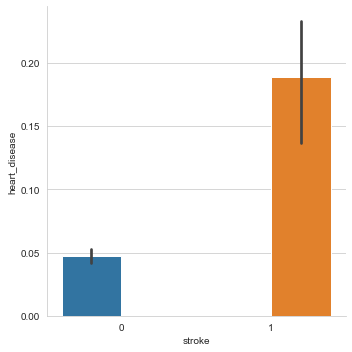

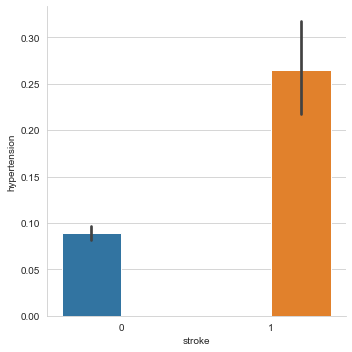

In [97]:
#hypertension and heart disease increases the risk of an individual having a stroke
sns.catplot(data=data, kind="bar", x="stroke", y="heart_disease", hue="stroke") #heart disease vs stroke
sns.catplot(data=data, kind="bar", x="stroke", y="hypertension", hue="stroke") #hypertension vs stroke

We find that both hypertension and heart disease seem to be associated with increase risks of stroke. 

#### Smoking effect

In [7]:
# For categorical variable smoking
pd.crosstab(data['smoking_status'], data['stroke'], normalize = 'index')

stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920904,0.079096
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


In [8]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Of the people who smoke 5.3% have had a stroke wheras for those who do not smoke, it is only 4.8%
Small differences. We also notice the unkwon option which have many entries so we cannot just remove these. 

### Type of work effects

In [9]:
pd.crosstab(data['work_type'], data['stroke'], normalize = 'index')

stroke,0,1
work_type,,
Govt_job,0.949772,0.050228
Never_worked,1.000000,0.000000
Private,0.949060,0.050940
Self-employed,0.920635,0.079365
children,0.997089,0.002911


Again, small differences where it seem to be that self-employed have the highest rate of 7.9% strokes compared to provate 5.1% and government job 5%

### Residence type effect

In [10]:
pd.crosstab(data['Residence_type'], data['stroke'], normalize = 'index')

stroke,0,1
Residence_type,,
Rural,0.954654,0.045346
Urban,0.947997,0.052003


Slightly higher percentage for Urban 5.2% that for Rural 4.5% residences. 

# Missing values

### BMI column

We investigate the BMI column that contained missing values 

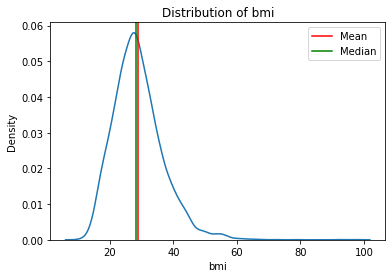

In [11]:
sns.kdeplot(data=data, x='bmi') 
plt.axvline(np.mean(data['bmi']), 0,1.6, color = "red", label = "Mean")
plt.axvline(np.nanmedian(data['bmi']), 0,1.6, color = "green", label = "Median")
plt.legend()
plt.title("Distribution of bmi")
plt.show()

The distribution is skewed. We look into it with a boxlpot  

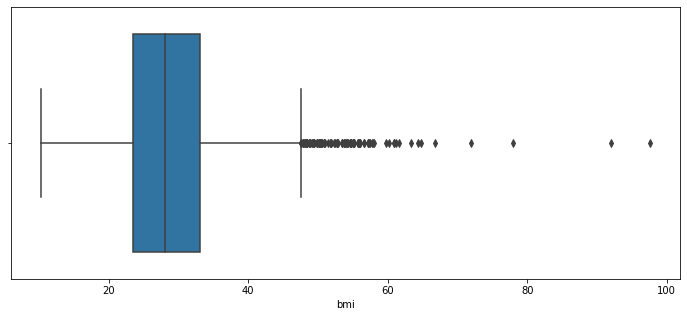

In [12]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x="bmi")
plt.show()

We find a lot of outlier on the right. As the distribution plot showed the median was slightly closer to the highest point of the distribution, we choose that for imputing missing values for the preprocessing. 

# Gender entries

We look into the unique variable entries

In [13]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [14]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
len(data[data.gender == 'Other'])
# Only one in the other category. Could be removed in preprocessing

1

# We check for multicollinearity 

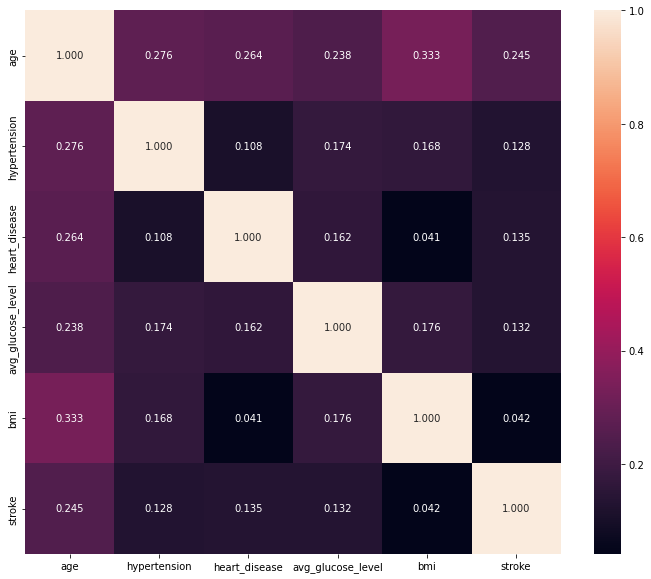

In [16]:
plt.figure(figsize=(12, 10))
g = sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.show()

None of the variables are highly correlated and therefore no problem with multicollinearity.
BMI and age has the highet correlation. All are positively correlated. 

# Check the data after preprocessing

In [18]:
# %% Load and preprocess data
data_loader = DataLoader("healthcare-dataset-stroke-data.csv")
data_loader.load_dataset()
data_loader.preprocess_data()

# Split the data for evaluation
X_train, X_test, X_val, y_train, y_test, y_val = data_loader.get_data_split(ANN = True)
print("Check shapes are 60-20-20 split:")
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

Check shapes are 60-20-20 split:
(3065, 20)
(1022, 20)
(1022, 20)


In [20]:
# Oversample the train data 
X_train, y_train = data_loader.undersample(X_train, y_train)
print("After undersampling:", X_train.shape)

After undersampling: (308, 20)


#### Check the distributions of the data splits

In [39]:
def pie_chart_dist(data, title):
    pie_colors = ('#140E36', '#091AAB')

    pred_classes = data.stroke.value_counts()
    print(type(pred_classes))

    plt.figure(figsize=(10, 5))
    patches, texts, pcts = plt.pie(pred_classes,
                                labels=['no', 'yes'],
                                colors=pie_colors,
                                pctdistance=0.65,
                                shadow=True,
                                startangle=90,
                                autopct='%1.1f%%',
                                textprops={'fontsize': 20,
                                            'color': 'black',
                                            'weight': 'bold',
                                            'family': 'serif'})
    plt.setp(pcts, color='white')

    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(str(title), size=20, **hfont)

    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

<class 'pandas.core.series.Series'>


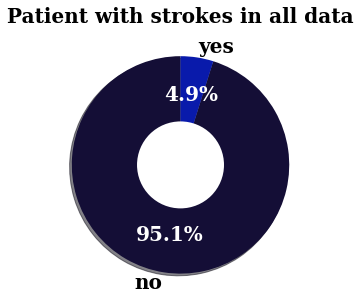

In [42]:
pie_chart_dist(data, 'Patient with strokes in all data')

<class 'pandas.core.series.Series'>


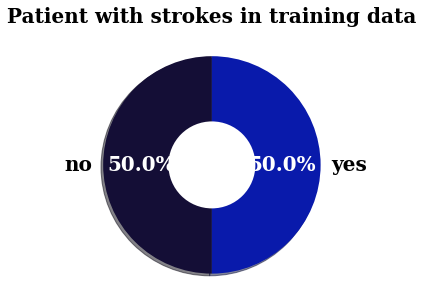

In [46]:
pie_chart_dist(pd.DataFrame(y_train), 'Patient with strokes in training data')

<class 'pandas.core.series.Series'>


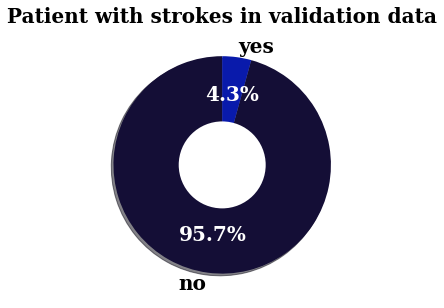

In [50]:
plot1 = pie_chart_dist(pd.DataFrame(y_val), 'Patient with strokes in validation data')

<class 'pandas.core.series.Series'>


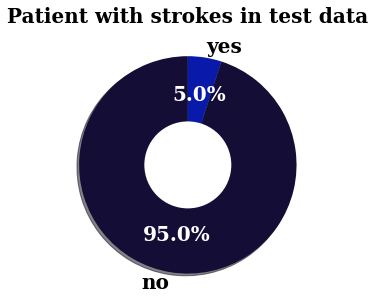

In [49]:
plot1 = pie_chart_dist(pd.DataFrame(y_test), 'Patient with strokes in test data')

Distributions are as expected. 